# Importing all the neccessary Libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt      # or, import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
covid=pd.read_csv("covid_19_india.csv",parse_dates=['Date'],dayfirst=True)
test_state=pd.read_csv("StatewiseTestingDetails.csv",parse_dates=['Date'],dayfirst=True)

In [3]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
test_state.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [5]:
covid.isnull().sum() # no null values are present

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
test_state.isnull().sum()     # we have here null values in negative and positive columns.

Date                0
State               0
TotalSamples        0
Negative         9367
Positive        10674
dtype: int64

In [7]:
covid = covid.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational','Time'], axis=1)

# deleting sno , ConfirmedIndianNational,ConfirmedForeignNational these are not neccesaary ..
#so either we can drop the column name or covid=covid[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]


In [8]:
covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [9]:
#Just Rename the column if neccessary
covid.columns=['date','state','cured','deaths','confirmed']

In [10]:
covid.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [11]:
# calculating active cases in our country
covid['active'] = covid['confirmed'] - covid['cured'] - covid['deaths']
covid.head()


,date,state,cured,deaths,confirmed,active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [12]:
covid.tail()

,date,state,cured,deaths,confirmed,active
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [13]:
type(covid['date'])

pandas.core.series.Series

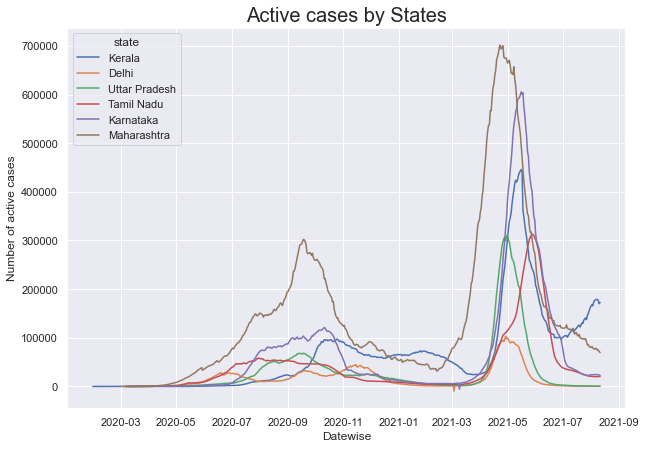

In [14]:
#PLOTING THE GRAPH  OF ACTIVE CASES ON THE BASIS OF DATE FOR SOME STATES.
sns.set(rc={'figure.figsize':(10,7)}) # dimension od graph/plot is 10X7.   or    plt.figure(figsize=(10,7)
ax=sns.lineplot(data=covid[covid['state'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],x='date',y='active',hue='state')
ax.set_title("Active cases by States", size=20)
plt.ylabel("Number of active cases")
plt.xlabel("Datewise")
plt.show()
# Active cases in top 6 states during the period of time

In [15]:
india_cases = covid[covid['date'] == covid['date'].max()]
india_cases.index = india_cases["state"]
india_cases = india_cases.drop(['state','date'], axis=1)

In [16]:
india_cases

,cured,deaths,confirmed,active
state,,,,
Andaman and Nicobar Islands,7412,129,7548,7
Andhra Pradesh,1952736,13564,1985182,18882
Arunachal Pradesh,47821,248,50605,2536
Assam,559684,5420,576149,11045
Bihar,715352,9646,725279,281
Chandigarh,61150,811,61992,31
Chhattisgarh,988189,13544,1003356,1623
Dadra and Nagar Haveli and Daman and Diu,10646,4,10654,4
Delhi,1411280,25068,1436852,504


In [17]:
#TOP 10 DEATHS,ACTIVE,CONFIRMED CASES STATES ANALYSIS.

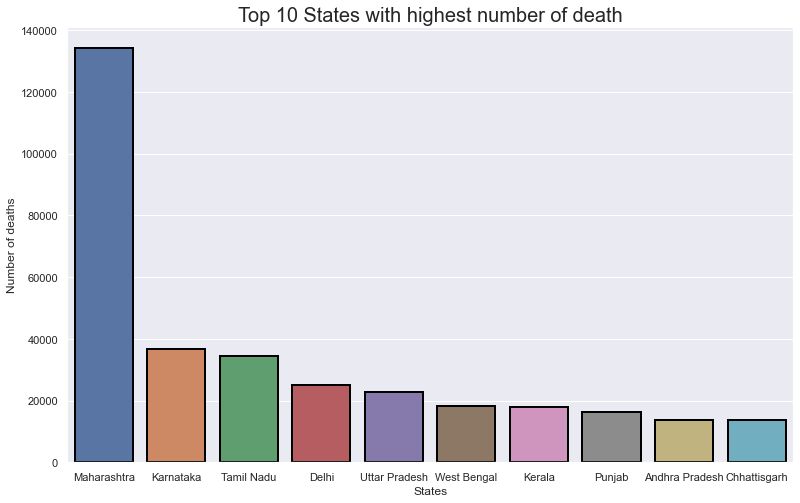

In [18]:
top_10_death_states = india_cases.sort_values('deaths',ascending = False)[:10]
sns.set(rc={'figure.figsize':(13,8)})
plt.title("Top 10 States with highest number of death", size=20)
plt.xlabel("States")
plt.ylabel("Number of deaths in thousands")
ax=sns.barplot(data=top_10_death_states.iloc[:10],y=top_10_death_states.deaths,x=top_10_death_states.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of deaths')
plt.show()

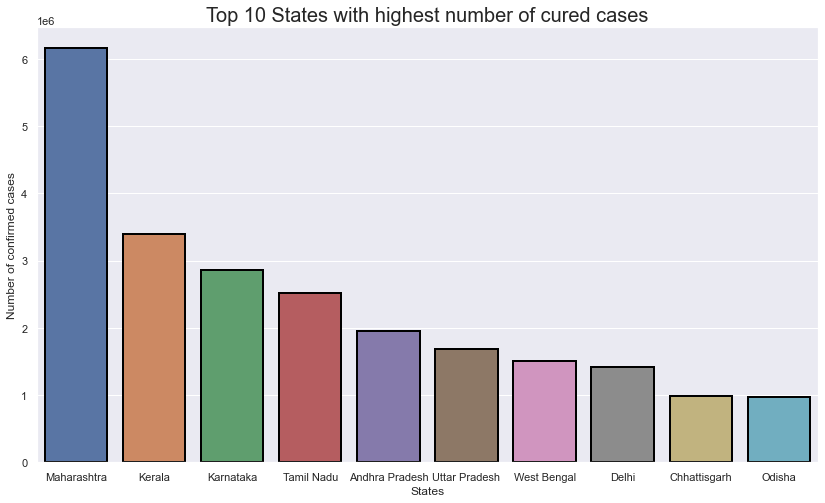

In [19]:
top_10_cured_cases = india_cases.sort_values('cured',ascending = False)[:10]
sns.set(rc={'figure.figsize':(14,8)})
plt.title("Top 10 States with highest number of cured cases", size=20)
plt.xlabel("states")
plt.ylabel("Number of cured cases")
ax=sns.barplot(data=top_10_cured_cases.iloc[:10],y=top_10_cured_cases.cured,x=top_10_cured_cases.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

In [20]:
covid

,date,state,cured,deaths,confirmed,active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545


In [21]:
df1=covid.groupby('date')[['cured','deaths','confirmed']].sum()

In [22]:
df1

,cured,deaths,confirmed
date,,,
2020-01-30,0,0,1
2020-01-31,0,0,1
2020-02-01,0,0,2
2020-02-02,0,0,3
2020-02-03,0,0,3
...,...,...,...
2021-08-07,31055861,427371,31895385
2021-08-08,31099771,427862,31934455
2021-08-09,31139457,428309,31969954


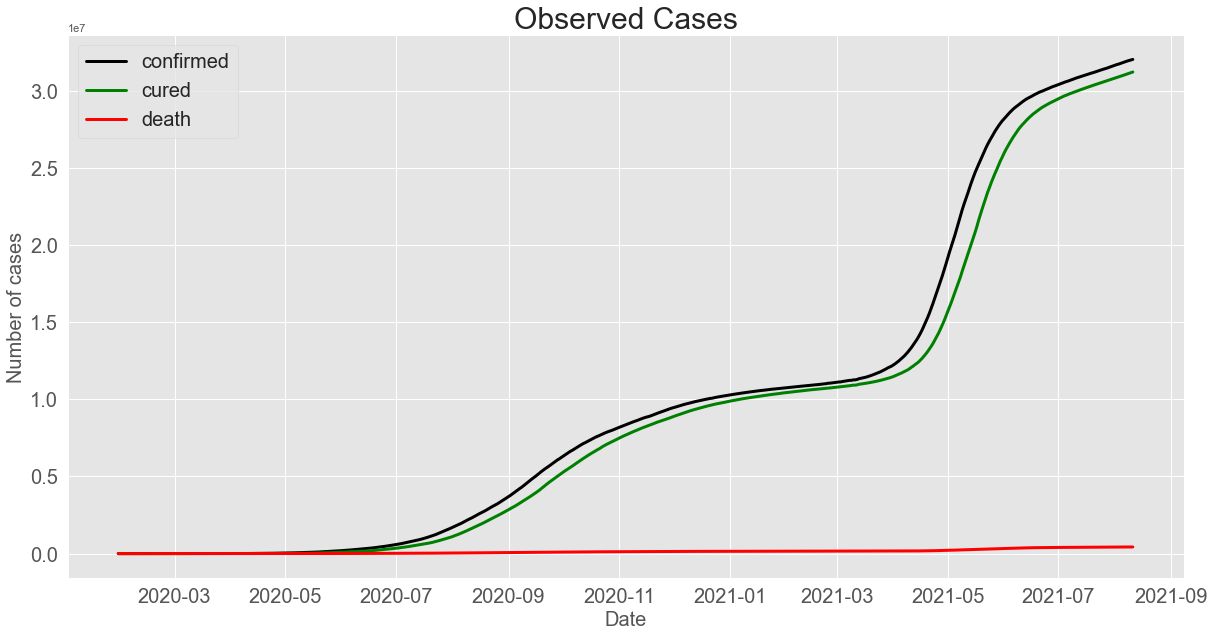

In [23]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.title('Observed Cases',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.plot(df1.index,df1['confirmed'],linewidth=3,label='confirmed',color='black')
plt.plot(df1.index,df1['cured'],linewidth=3,label='cured',color='green')
plt.plot(df1.index,df1['deaths'],linewidth=3,label='death',color='red')
plt.legend(fontsize=20)


In [24]:
df2=covid.groupby('state')[['cured','deaths','confirmed']].sum()

In [25]:
df2.head()

,cured,deaths,confirmed
state,,,
Andaman and Nicobar Islands,1848286,27136,1938498
Andhra Pradesh,370426530,2939367,392432753
Arunachal Pradesh,6588149,26799,7176907
Assam,92678680,638323,99837011
Bihar,125122902,1093466,132231166


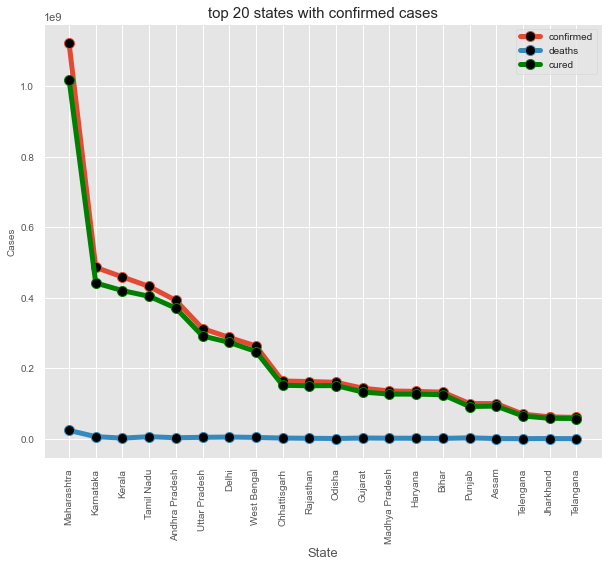

In [26]:
df2=df2.nlargest(20,'confirmed')
plt.figure(figsize=(10,8))
plt.title('top 20 states with confirmed cases',fontsize=15)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('State',fontsize=13)
plt.ylabel('Cases',fontsize=10)
plt.plot(df2.index,df2.confirmed,marker='o',mfc='black',label='confirmed',markersize=10,linewidth=5)
plt.plot(df2.index,df2.deaths,marker='o',mfc='black',label='deaths',markersize=10,linewidth=5)
plt.plot(df2.index,df2.cured,marker='o',mfc='black',label='cured',markersize=10,linewidth=5,color='green')
plt.legend(fontsize=10)

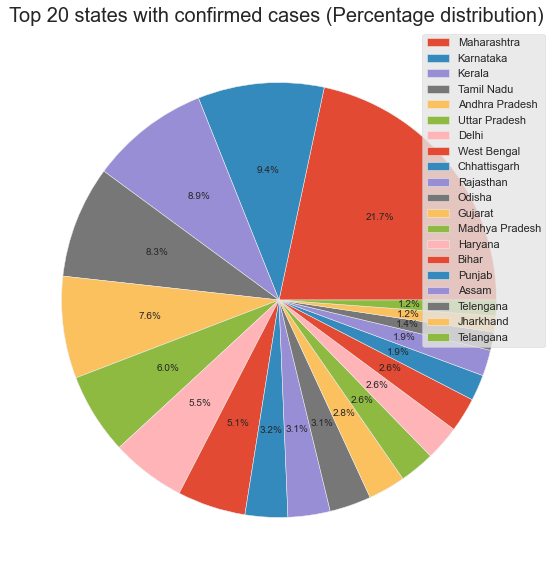

In [27]:
percentage=[]             #empty list
for i in df2.confirmed:
    per=i/len(df2)
    percentage.append(i)
plt.figure(figsize=(25,10))    
plt.title('Top 20 states with confirmed cases (Percentage distribution) ',fontsize=20)
plt.pie(percentage,autopct='%1.1f%%')
plt.legend(df2.index,loc='upper right')

In [28]:
covid=pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [29]:
covid['Date']=pd.to_datetime(covid['Date'])
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [30]:
type(covid['Date'])

pandas.core.series.Series

In [31]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
lbl=LabelEncoder()
covid['State/UnionTerritory']=lbl.fit_transform(covid['State/UnionTerritory'])
covid['date']=covid['Date'].dt.day
covid['time']=covid['Date'].dt.time


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [33]:
tree=DecisionTreeRegressor()
linear=LinearRegression()
nb=GaussianNB()
forest=RandomForestRegressor()


In [34]:
#Spliting train test data

In [35]:
#converting the date to ordinal number.
covid['Date']=covid['Date'].map(dt.datetime.toordinal)

In [36]:
x=covid[['Date','Cured','Deaths']]
y=covid['Confirmed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
#Fitting models

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [40]:
linear.fit(x_train,y_train)


LinearRegression()

In [41]:
nb.fit(x_train,y_train)


GaussianNB()

In [42]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [43]:
#Prediction and Comparision

In [44]:
from sklearn.metrics import r2_score
prediction1=tree.predict(x_test)
score1=r2_score(y_test,prediction1)

In [45]:
score1

0.9994886234058118

In [46]:
prediction2=linear.predict(x_test)
score2=r2_score(y_test,prediction2)
score2

0.9959589757797335

In [47]:
prediction3=forest.predict(x_test)
score3=r2_score(y_test,prediction3)
score3

0.9996756064553421

In [48]:
prediction4=nb.predict(x_test)
score4=r2_score(y_test,prediction4)
score4

0.35669775588382346

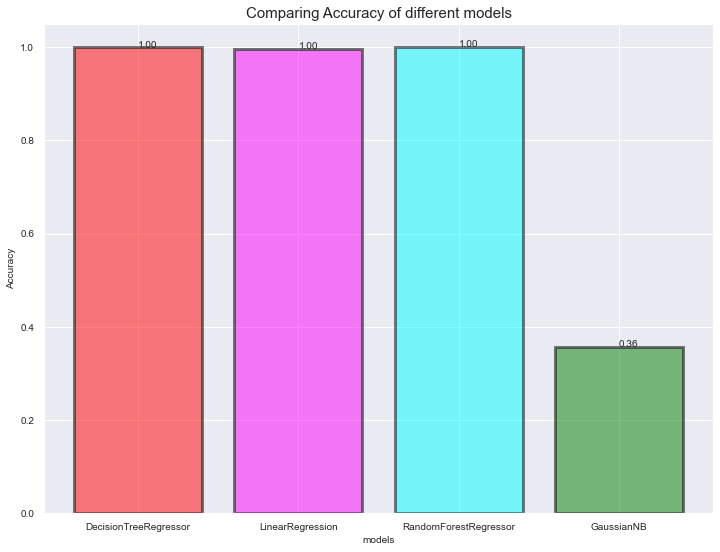

In [50]:
scores=[score1,score2,score3,score4]
models=['DecisionTreeRegressor','LinearRegression','RandomForestRegressor','GaussianNB']
sns.set(rc={'figure.figsize':(12,9)})
plt.title('Comparing Accuracy of different models',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('models',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.bar(models,scores,color=['red','magenta','cyan','green'],alpha=0.5,linewidth=3,edgecolor='black')
for i,j in enumerate(scores):
    plt.text(i,j,format(scores[i],'.2f'),fontsize=10)

In [51]:
#THIS SHOWS ALL MODEL EXCEPT GAUSSIAN NB ,GIVES EXCELLENT RESULT OR ACCURACY...
#BUT OUT OF THAT ALSO..RANDOM FOREST REGRESSOR GIVES THE BEST OUT OF THEM.

In [ ]:
#SO ULTIMATELY prediciton of....

In [60]:
x_test

,Date,Cured,Deaths
14915,737925,98200,1998
435,737512,0,0
2641,737580,1089,23
875,737527,6,4
14449,737912,394709,4341
...,...,...,...
8852,737756,516978,2148
2244,737569,6267,231
14011,737900,30325,417
7566,737719,28774,577


In [72]:
y_pred=forest.predict(x_test)

In [74]:
y_pred

array([1.2922767e+05, 4.1062785e+00, 2.6332600e+03, ..., 3.3177590e+04,
       3.3708380e+04, 9.3209700e+03])

In [75]:
a=[[740000,20000,800]]     # this is Date, Cured cases, Deaths
pred=forest.predict(a)
pred                       # for that we get predicted value of confirmed cases......here for this data it came to 24144 approx.

array([24144.76])